In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
# 데이터를 불러 옵니다.
df = pd.read_csv("Housing.csv")

# 데이터를 미리 살펴 보겠습니다. 
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [33]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다. 
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [34]:
# 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [35]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.(12장 3절)
df = pd.get_dummies(df)

# 결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다. 
df = df.fillna(df.mean())

# 업데이트된 데이터프레임을 출력해 봅니다.
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [38]:
#데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

#집 값과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('price', ascending=False)

#집 값과 관련도가 가장 큰 10개의 속성들을 출력합니다. 
df_corr_sort['price'].head(10)

price                  1.000000
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
bedrooms               0.366494
prefarea_yes           0.329777
mainroad_yes           0.296898
guestroom_yes          0.255517
Name: price, dtype: float64

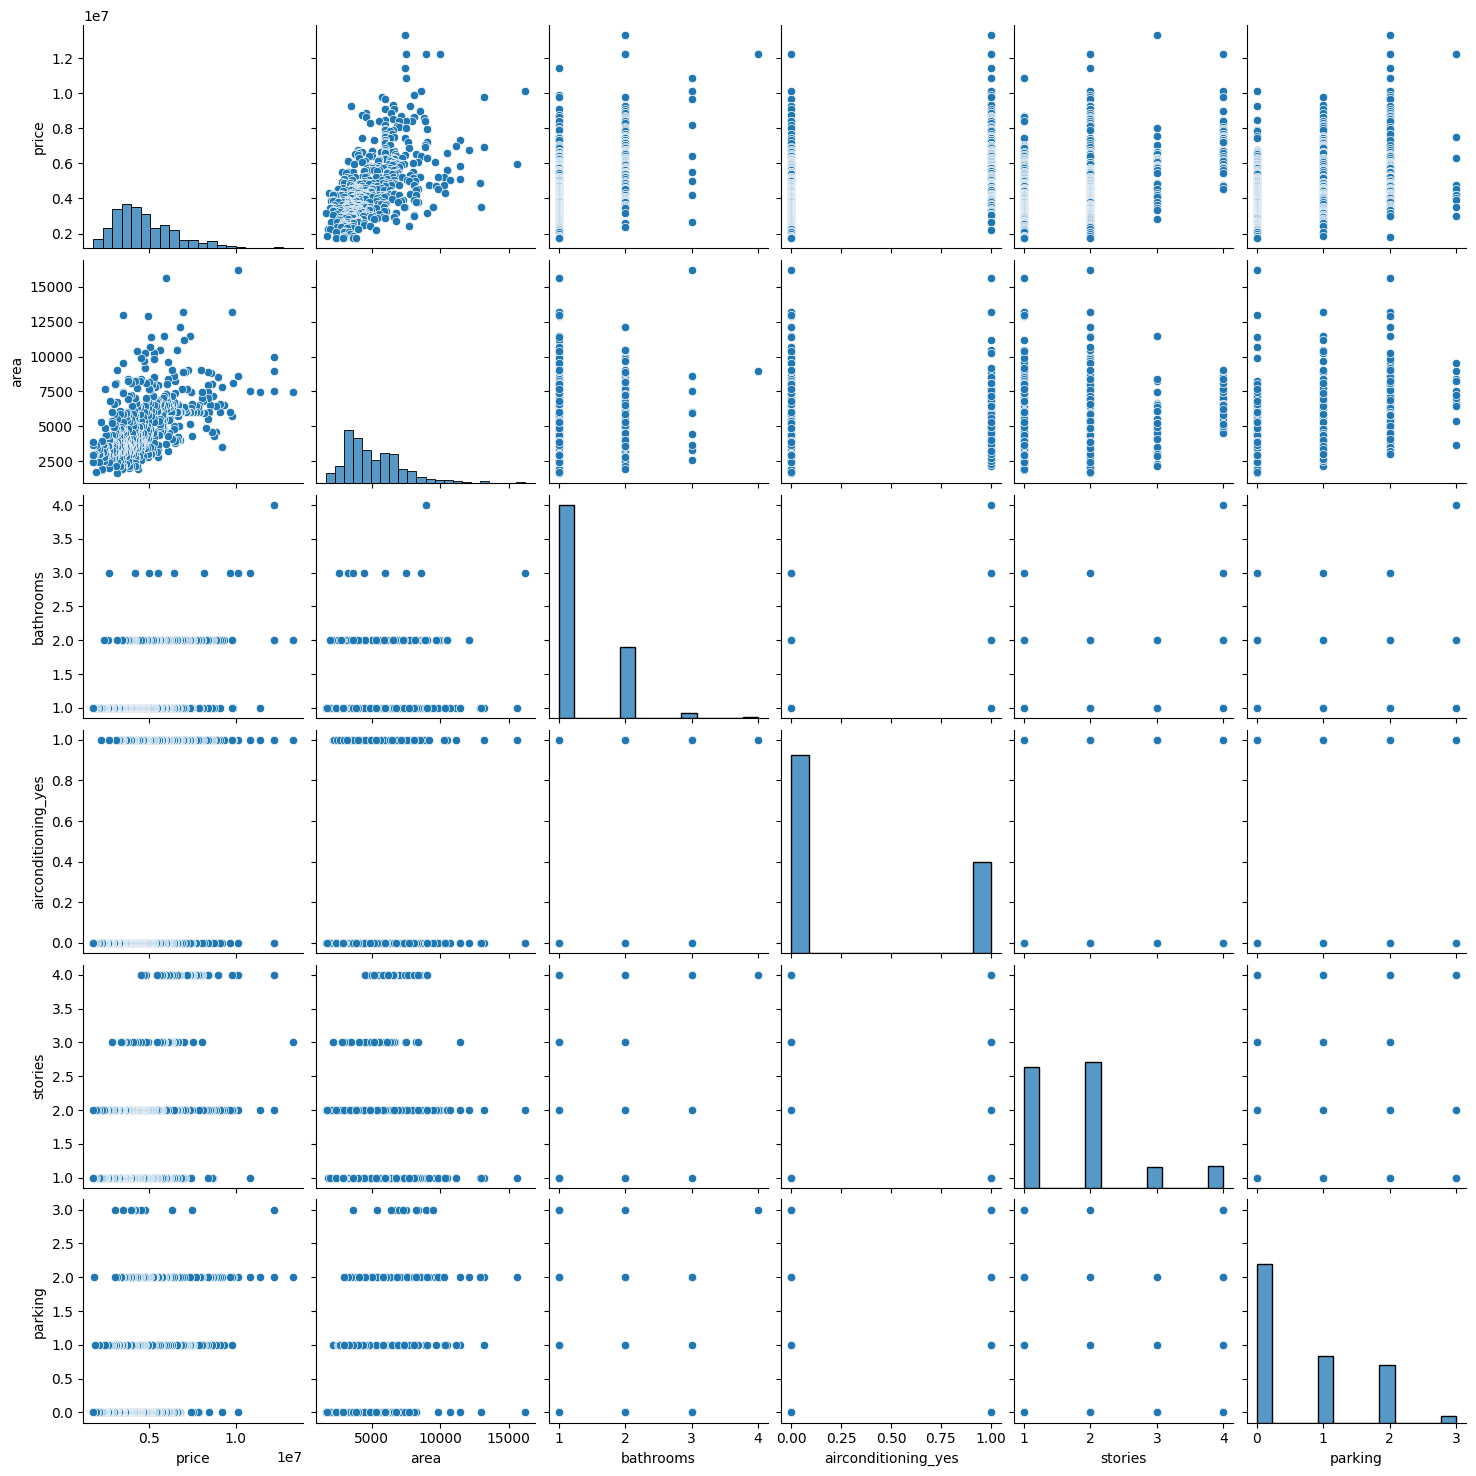

In [39]:
#집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['price','area','bathrooms','airconditioning_yes','stories','parking']
sns.pairplot(df[cols])
plt.show();

In [40]:
#집 값을 제외한 나머지 열을 저장합니다. 
cols_train=['area','bathrooms','airconditioning_yes','stories','parking']
X_train_pre = df[cols_train]

#집 값을 저장합니다.
y = df['price'].values

In [41]:
#전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [43]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="model.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다. 
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Train on 327 samples, validate on 109 samples
Epoch 1/2000
327/327 [==============================] - 0s 227us/sample - loss: 26103221628765.1602 - val_loss: 24613259560866.0547
Epoch 2/2000
327/327 [==============================] - 0s 89us/sample -

327/327 [==============================] - 0s 80us/sample - loss: 3598160919473.7124 - val_loss: 3137568794454.8989
Epoch 56/2000
327/327 [==============================] - 0s 83us/sample - loss: 3587847663853.9941 - val_loss: 3137415978932.8442
Epoch 57/2000
327/327 [==============================] - 0s 28us/sample - loss: 3587261745559.0952 - val_loss: 3137653296212.5503
Epoch 58/2000
327/327 [==============================] - 0s 24us/sample - loss: 3588880729266.4956 - val_loss: 3137772583757.5044
Epoch 59/2000
327/327 [==============================] - 0s 24us/sample - loss: 3585891025046.3120 - val_loss: 3137685929533.0649
Epoch 60/2000
327/327 [==============================] - 0s 28us/sample - loss: 3584808721855.8047 - val_loss: 3138122000064.5869
Epoch 61/2000
327/327 [==============================] - 0s 31us/sample - loss: 3592516556317.7490 - val_loss: 3140188071165.6514
Epoch 62/2000
327/327 [==============================] - 0s 28us/sample - loss: 3586819706642.0059 - val

Epoch 118/2000
327/327 [==============================] - 0s 28us/sample - loss: 3587484212020.4526 - val_loss: 3142880606301.9448
Epoch 119/2000
327/327 [==============================] - 0s 28us/sample - loss: 3586582825467.3022 - val_loss: 3142689486491.0093
Epoch 120/2000
327/327 [==============================] - 0s 24us/sample - loss: 3590959928410.8135 - val_loss: 3145543128355.2295
Epoch 121/2000
327/327 [==============================] - 0s 28us/sample - loss: 3587061266325.5293 - val_loss: 3143032105091.5229
Epoch 122/2000
327/327 [==============================] - 0s 28us/sample - loss: 3584840549905.2231 - val_loss: 3140539309253.2842
Epoch 123/2000
327/327 [==============================] - 0s 24us/sample - loss: 3582980536413.9448 - val_loss: 3137368154487.7798
Epoch 124/2000
327/327 [==============================] - 0s 24us/sample - loss: 3583368555830.0186 - val_loss: 3137517397395.9634
Epoch 125/2000
327/327 [==============================] - 0s 28us/sample - loss: 35

327/327 [==============================] - 0s 28us/sample - loss: 3582978905028.5015 - val_loss: 3134725688855.4868
Epoch 181/2000
327/327 [==============================] - 0s 31us/sample - loss: 3587050090333.1626 - val_loss: 3134687803035.0093
Epoch 182/2000
327/327 [==============================] - 0s 92us/sample - loss: 3584534681969.5166 - val_loss: 3134185903094.6055
Epoch 183/2000
327/327 [==============================] - 0s 95us/sample - loss: 3583725940072.1221 - val_loss: 3134139207792.7339
Epoch 184/2000
327/327 [==============================] - 0s 28us/sample - loss: 3586668620308.3550 - val_loss: 3135053248605.9448
Epoch 185/2000
327/327 [==============================] - 0s 28us/sample - loss: 3584636529723.4985 - val_loss: 3135514056873.1011
Epoch 186/2000
327/327 [==============================] - 0s 24us/sample - loss: 3582480806576.9297 - val_loss: 3135022678767.5596
Epoch 187/2000
327/327 [==============================] - 0s 24us/sample - loss: 3581358710007.388

In [44]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

실제가격: 3675000.00, 예상가격: 3126861.75
실제가격: 3150000.00, 예상가격: 2973323.00
실제가격: 8295000.00, 예상가격: 4207636.50
실제가격: 4690000.00, 예상가격: 3720423.25
실제가격: 5110000.00, 예상가격: 9820785.00
실제가격: 4340000.00, 예상가격: 3018986.75
실제가격: 7245000.00, 예상가격: 7754405.50
실제가격: 3395000.00, 예상가격: 2974672.25
실제가격: 4445000.00, 예상가격: 3230090.00
실제가격: 4620000.00, 예상가격: 4894422.00
실제가격: 3220000.00, 예상가격: 2315858.25
실제가격: 4200000.00, 예상가격: 3447853.75
실제가격: 8400000.00, 예상가격: 6848430.50
실제가격: 6020000.00, 예상가격: 6890187.50
실제가격: 3780000.00, 예상가격: 4151843.50
실제가격: 6629000.00, 예상가격: 5168246.00
실제가격: 5950000.00, 예상가격: 6047158.50
실제가격: 5250000.00, 예상가격: 3275731.00
실제가격: 2653000.00, 예상가격: 2745509.00
실제가격: 9800000.00, 예상가격: 4958646.00
실제가격: 2975000.00, 예상가격: 3750580.50
실제가격: 3920000.00, 예상가격: 6254891.50
실제가격: 5215000.00, 예상가격: 6200526.50
실제가격: 4956000.00, 예상가격: 2418350.00
실제가격: 3773000.00, 예상가격: 5968263.00


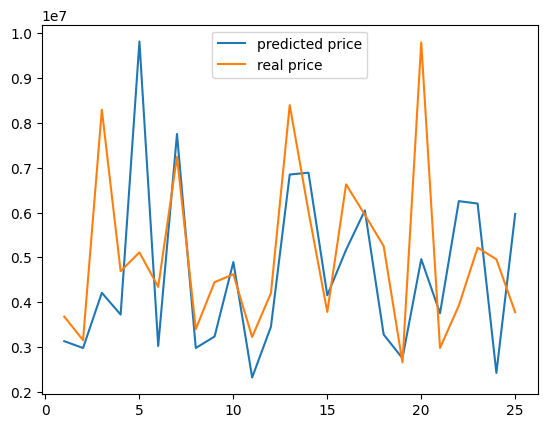

In [45]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()